# Assignment 2 - Machine Learning Basics

## *Maobin Guo*
Netid:  *mg471*

Instructions for all assignments can be found [here](https://github.com/kylebradbury/ids705/blob/master/assignments/_Assignment%20Instructions.ipynb), which is also linked to from the [course syllabus](https://kylebradbury.github.io/ids705/index.html).

## Learning Objectives:
By successfully completing this assignment you will be able to...
- Implement a k-nearest neighbors machine learning algorithm from scratch in a style similar to that of popular machine learning tools like `scikit-learn`
- Describe how KNN classification works, the method's reliance on distance measurements, and the impact of higher dimensionality on computational speed
- Apply regression (linear regression) and classification (KNN) supervised learning techniques to data and evaluate the performance of those methods
- Explain the bias-variance tradeoff and the impact of model flexibility on algorithm performance
- Construct simple feature transformations for improving model fit in linear models
- Fit a `scikit-learn` supervised learning technique to data and make predictions using it

In [1]:
# MAC USERS TAKE NOTE:
# For clearer plots in Jupyter notebooks on macs, run the following line of code:
# %config InlineBackend.figure_format = 'retina'

# Conceptual Questions

## 1
**[5 points]**
For each part (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

1. The sample size $n$ is extremely large, and the number of predictors $p$ is small.
2. The number of predictors $p$ is extremely large, and the number of observations $n$ is small.
3. The relationship between the predictors and response is highly non-linear.
4. The variance of the error terms, i.e. $\sigma^2 = Var(\epsilon)$, is extremely high

**ANSWER**

> **ANSWER 1** <br>
In this situation, the flexible model will be better because the sample size is large and the predictor is small. It means the model is not easy to overfit.

> **ANSWER 2** <br>
The flexible model will be worse than the inflexible model because the sample size is small and predictors p is large. In this situation, a complex model is easy to overfit. 

> **ANSWER 3** <br>
The flexible model will be better since it is suitable to fit a non-linear relationship. 

> **ANSWER 4** <br>
The flexible model is worse than inflexible because it will learn too much noise in this situation.

## 2
**[5 points]** For each of the following, (i) explain if each scenario is a classification or regression problem, (ii) indicate whether we are most interested in inference or prediction for that problem, and (iii) provide the sample size $n$ and number of predictors $p$ indicated for each scenario.

**(a)** We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.

**(b)** We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.

**(c)** We are interesting in predicting the % change in the US dollar in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the dollar, the % change in the US market, the % change in the British market, and the % change in the German market.

**ANSWER**

> **(a)** <br>
- (i)  This is a regression problem, the response variable is profit.
- (ii) We are interested in inference.
- (iii) n = 500 (500 firms), p = 3 (number of employees, industry, CEO salary)

> **(b)** <br>
- (i)  This is a classification problem, the response variable is whether it will be a success or a failure.
- (ii) We are interested in prediction.
- (iii) n = 20 (20 similar products), p = 13 (price charged for the product, marketing budget, competition price, and ten other variables)

> **(c)** <br>
- (i)  This is a regression problem, the response variable is percentage change in the US dollar.
- (ii) We are interested in prediction.
- (iii) n = 52 (52 weeks), p = 3 (percentagle change in the US, British and German market)

# Practical Questions

## 3
**[10 points] Classification II**. The table below provides a training dataset containing six observations ($n=6$), three predictors ($p=3$), and one qualitative response variable.

*Table 1. Dataset with $n=6$ observations in $p=3$ dimensions with a categorical response, $y$*

| Obs. | $x_1$ | $x_2$ | $x_3$ | $y$   |
|------|-------|-------|-------|-------|
| **1**| 0     | 3     | 0     | Red   |
| **2**| 2     | 0     | 0     | Red   |
| **3**| 0     | 1     | 3     | Red   |
| **4**| 0     | 1     | 2     | Blue  |
| **5**| -1    | 0     | 1     | Blue  |
| **6**| 1     | 1     | 1     | Red   |

We want to use this dataset to make a prediction for $y$ when $x_1=x_2=x_3=0$ using $K$-nearest neighbors. You are given some code below to get you started. *Note: coding is only required for part (a), for (b)-(d) please provide your reasoning*.

**(a)** Compute the Euclidean distance between each observation and the test point, $x_1=x_2=x_3=0$. Present your answer in a table similar in style to Table 1 with observations 1-6 as the row headers.

**(b)** What is our prediction with $K=1$? Why?

**(c)** What is our prediction with $K=3$? Why?

**(d)** If the Bayes decision boundary (the optimal decision boundary) in this problem is highly nonlinear, then would we expect the *best* value of $K$ to be large or small? Why?

In [13]:
import numpy as np

X = np.array([[ 0, 3, 0],
              [ 2, 0, 0],
              [ 0, 1, 3],
              [ 0, 1, 2],
              [-1, 0, 1],
              [ 1, 1, 1]])
y = np.array(['r','r','r','b','b','r'])

**ANSWER**:

##### (a)

In [24]:
from sklearn.metrics.pairwise import euclidean_distances

test =  [[0, 0, 0]]

euc_dist = euclidean_distances(X, test)
print(euc_dist)

[[3.        ]
 [2.        ]
 [3.16227766]
 [2.23606798]
 [1.41421356]
 [1.73205081]]


*Table 2. Euclidean Distances from test point $x_1=x_2=x_3=0$ to each observation*

| Obs. | Euclidean Distances | 
|------|-------| 
| **1**| 3.00  |  
| **2**| 2.00  |  
| **3**| 3.16  |  
| **4**| 2.24  |  
| **5**| 1.41  | 
| **6**| 1.73  | 

##### (b) 
> K=1 means we need only check the nearest point, which is point No.5. Hence, the test point's label should be blue when K=1.

##### (c)
> Then K=3, the test point's label should be red because two of its three nearest points are red.

##### (d)
> If the Bayes decision boundary in this problem is highly nonlinear,  a small K is better. Because KNN with a small K is flexible and a flexible model is more suitable for nonlinear problems.

## 4
**[20 points] Classification I: Creating a classification algorithm**.

**(a)** Build a working version of a binary kNN classifier using the skeleton code below.

**(b)** Load the datasets to be evaluated here. Each includes training features ($\mathbf{X}$), and test features ($\mathbf{y}$) for both a low dimensional ($p = 2$ features/predictors) and a high dimensional ($p = 100$ features/predictors). For each of these datasets there are $n=100$ observations of each. They can be found in the `data` subfolder in the `assignments` folder on github. Each file is labeled similar to `A2_X_train_low.csv`, which lets you know whether the dataset is of features, $X$, targets, $y$; training or testing; and low or high dimensions.

**(c)** Train your classifier on first the low dimensional dataset and then the high dimensional dataset with $k=5$. Evaluate the classification performance on the corresponding test data for each. Calculate the time it takes to make the predictions in each case and the overall accuracy of each set of test data predictions.

**(d)** Compare your implementation's accuracy and computation time to the scikit learn [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) class. How do the results and speed compare?

**(e)** Some supervised learning algorithms are more computationally intensive during training than testing. What are the drawbacks of the prediction process being slow?

**ANSWER**:

##### (a) A working KNN class

In [68]:
import time
import pandas as pd
import scipy.stats as ss

from sklearn.metrics.pairwise import euclidean_distances

# (a) Write your own kNN classifier
class Knn:
    # k-Nearest Neighbor class object for classification training and testing
    def __init__(self):
        self.x = []
        self.y = []
        
    def fit(self, x, y):
        # Save the training data to properties of this class
        self.x = x
        self.y = y
        
    def predict(self, x, k):
        # Calculate the distance from each vector in x to the training data
        dist_matrix = euclidean_distances(self.x, x, squared=True)
 
        top_points = np.apply_along_axis(lambda z: list(map(lambda p: 1 if p[1]<k else 0,  
                                                            enumerate(ss.rankdata(z) - 1))), 
                                         1, dist_matrix)

        y_hat = [1 if x else 0 for x in (np.dot(top_points, self.y) > k/2)]

        # Return the estimated targets
        return y_hat

# Metric of overall classification accuracy
#  (a more general function, sklearn.metrics.accuracy_score, is also available)
def accuracy(y,y_hat):
    nvalues = len(y)
    accuracy = sum(y == y_hat) / nvalues
    return accuracy

##### (b) Load data

In [69]:
X_train_high = pd.read_csv("./data/A2_X_train_high.csv", header = None)
X_train_low = pd.read_csv("./data/A2_X_train_low.csv", header = None)
X_test_high = pd.read_csv("./data/A2_X_test_high.csv", header = None)
X_test_low = pd.read_csv("./data/A2_X_test_low.csv", header = None)

y_train_high = pd.read_csv("./data/A2_y_train_high.csv", header = None)
y_train_low = pd.read_csv("./data/A2_y_train_low.csv", header = None)
y_test_high = pd.read_csv("./data/A2_y_test_high.csv", header = None)
y_test_low = pd.read_csv("./data/A2_y_test_low.csv", header = None)

##### (c)

In [70]:
K = 5
knn = Knn()

### Low dimension 
time_begin = time.time()
knn.fit(X_train_low, y_train_low)
y_hat    = knn.predict(X_test_low, K)
accu = accuracy(y_test_low.iloc[:,0], y_hat)
duration = time.time() - time_begin

print("[Low dimension] Accuracy [{:0.4f}] \t Time [{:0.4f}] Sec".format(accu, duration))

### High dimension 
time_begin = time.time()
knn.fit(X_train_high, y_train_high)
y_hat    = knn.predict(X_test_high, K)
accu = accuracy(y_test_high.iloc[:,0], y_hat)
duration = time.time() - time_begin

print("[High dimension] Accuracy [{:0.4f}] \t Time [{:0.4f} Sec]".format(accu, duration))


[Low dimension] Accuracy [0.9170] 	 Time [0.6353] Sec
[High dimension] Accuracy [0.9900] 	 Time [0.6413 Sec]


##### (d)

In [73]:
from sklearn.neighbors import KNeighborsClassifier

nkc = KNeighborsClassifier(n_neighbors = 5)

# Low 
time_begin = time.time()
nkc.fit(X_train_low.values, y_train_low.values.T[0])
y_hat    = nkc.predict(X_test_low.values)
accu = accuracy(y_test_low.iloc[:,0], y_hat)
duration = time.time() - time_begin
print("[Low dimension] Accuracy [{:0.4f}] \t Time [{:0.4f} Sec]".format(accu, duration))

# High 
time_begin = time.time()
nkc.fit(X_train_high.values, y_train_low.values.T[0])
y_hat    = nkc.predict(X_test_high.values)
accu = accuracy(y_test_high.iloc[:,0], y_hat)
duration = time.time() - time_begin
print("[High dimension] Accuracy [{:0.4f}] \t Time [{:0.4f} Sec]".format(accu, duration))


[Low dimension] Accuracy [0.9250] 	 Time [0.0349 Sec]
[High dimension] Accuracy [0.9930] 	 Time [0.2304 Sec]


> There is a minor difference about accuray between my result and KNeighborsClassifier's result. Also, KNeighborsClassifier costs far 
less time than my method.

##### (e)
>  The slow prediction will bring problems for some situations where there require real-time decisions. Typically, prediction speed will limit the applied range of an algorithm. For example, fraudulent transaction detection often requires fast decisions because a slow prediction will harm the user experience.  

## 5
**[20 points] Bias-variance tradeoff I: Understanding the tradeoff**. This exercise will illustrate the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

**(a)** Create a synthetic dataset (with both features and targets). Use the [`make_moons`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons) module with the parameter `noise=0.35` to generate 1000 random samples.

**(b)** Scatterplot your random samples with each class in a different color

**(c)** Create 3 different data subsets by selecting 100 of the 1000 data points at random three times. For each of these 100-sample datasets, fit three k-Nearest Neighbor classifiers with: $k = \{1, 25, 50\}$. This will result in 9 combinations (3 datasets, with 3 trained classifiers).

**(d)** For each combination of dataset trained classifier, in a 3-by-3 grid, plot the decision boundary (similar in style to Figure 2.15 from *Introduction to Statistical Learning*). Each column should represent a different value of $k$ and each row should represent a different dataset.

**(e)** What do you notice about the difference between the rows and the columns. Which decision boundaries appear to best separate the two classes of data? Which decision boundaries vary the most as the data change?

**(f)** Explain the bias-variance tradeoff using the example of the plots you made in this exercise.

**ANSWER**

#### (a)

In [90]:
import numpy as np
import random
from sklearn.datasets import make_moons

# Make sure reproducible
np.random.seed(213)

X_train, y_train = make_moons(n_samples=1000, noise=0.35)

#### (b)

<AxesSubplot:>

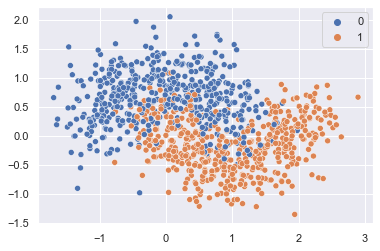

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")


sns.scatterplot(data=X_train, x=X_train[:,0], y=X_train[:,1], hue=y_train, palette="deep")

#### (c)

In [95]:
from sklearn.neighbors import KNeighborsClassifier

K_value = [1, 25, 50]
Sample_size = 100

# Set random seed
random.seed(123)

# get random index
sample_index_arr = [random.sample(range(0, 999), 100) for i in range(0, 3)]

# generate KNN model
knn_models_arr = [KNeighborsClassifier(n_neighbors = k) for k in K_value]


#### (d)

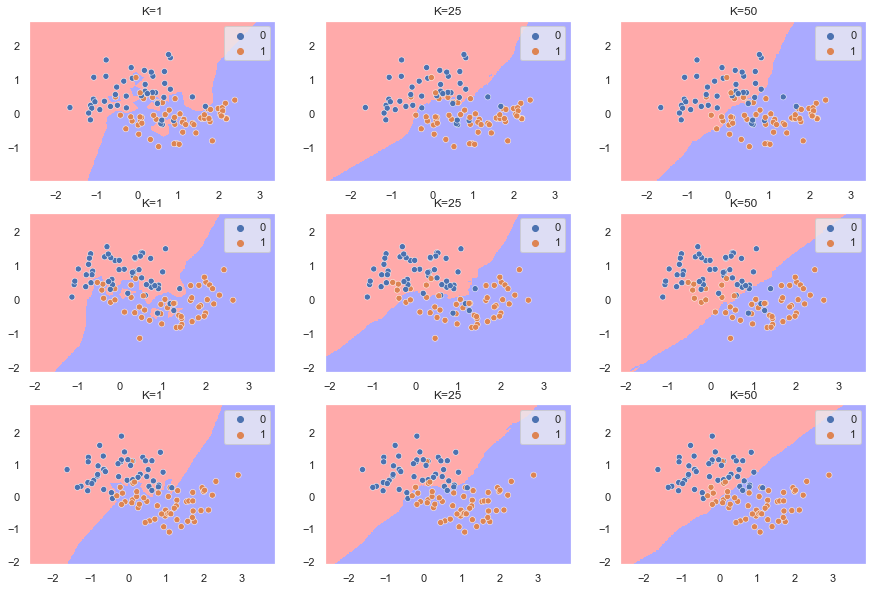

In [123]:
from matplotlib.colors import ListedColormap

step_size = .02

col_index = -1
row_index = -1

fig = plt.figure(figsize=(15,10))

for sample_index in sample_index_arr:
    col_index += 1
    row_index = -1
    
    for model in knn_models_arr:
        row_index += 1
        
        X = X_train[sample_index, :]
        y = y_train[sample_index]
        
        model.fit(X, y)
        
        # Plot the decision boundary.
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, step_size),
                             np.arange(y_min, y_max, step_size))
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        
        plt.subplot(3, 3, (3*col_index) + row_index + 1)
        
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')
        # Plot also the training points
        #plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
        sns.scatterplot(data=X, x=X[:, 0], y=X[:, 1], hue=y, palette="deep")
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.title("K={}".format(K_value[row_index]))



#### (e)

> The decision boundaries become more and more smooth from the right column to the left column.  At the same time, there is no apparent difference between each row. The right image boundary appears to best separate the two data classes because it looks smooth, which means there is no overfitting problem. The decision boundaries in the left columns (K=1) vary the most.

#### (f)

> The bias-variance tradeoff is the property of a model. The variance of the parameter estimates across samples can be reduced by increasing the bias in the estimated parameters. Take this task as an example; when K=1, the decision boundary is very rugged and can fig out almost every point, which means the model's bias error is low. However, it also means the model is overfitting, and it will suffer significant variance. For kNN, the best K value would neither make it overfit nor underfit. 

## 6
**[20 points] Bias-variance trade-off II: Quantifying the tradeoff**. This exercise will explore the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

Here, the value of $k$ determines how flexible our model is.

**(a)** Using the function created earlier to generate random samples (using the `make_moons` function), create a new set of 1000 random samples, and call this dataset your test set and the previously created dataset your training set.

**(b)** Train a kNN classifier on your training set for $k = 1,2,...500$. Apply each of these trained classifiers to both your training dataset and your test dataset and plot the classification error (fraction of mislabeled datapoints).

**(c)** What trend do you see in the results?

**(d)** What values of $k$ represent high bias and which represent high variance?

**(e)** What is the optimal value of $k$ and why?

**(f)** In kNN classifiers, the value of k controls the flexibility of the model - what controls the flexibility of other models?

**ANSWER**

## 7
**[20 points] Linear regression and nonlinear transformations**. You're given training and testing data contained in files "A2_Q7_train.csv" and "A2_Q7_test.csv" in the "data" folder for this assignment. Your goal is to develop a regression algorithm from the training data that performs well on the test data.

*Hint: Use the scikit learn [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) module.*

**(a)** Create a scatter plot of your training data.

**(b)** Estimate a linear regression model ($y = a_0 + a_1 x$) for the training data and calculate both the $R^2$ value and mean square error for the fit of that model for the training data. Also provide the equation representing the estimated model (e.g. $y = a_0 + a_1 x$, but with the estimated coefficients inserted. Consider this your baseline model against which you will compare other model options.

**(c)** If features can be nonlinearly transformed, a linear model may incorporate those non-linear feature transformation relationships in the training process. From looking at the scatter plot of the training data, choose a transformation of the predictor variable, $x$ that may make sense for these data. This will be a multiple regression model of the form $y = a_0 + a_1 x_1 + a_2 x_2 + \ldots + a_n x_n$. Here $x_i$ could be any transformations of x - perhaps it's $\frac{1}{x}$, $log(x)$, $sin(x)$, $x^k$ (where $k$ is any power of your choosing). Provide the estimated equation for this multiple regression model (e.g. if you chose your predictors to be $x_1 = x$ and $x_2 = log(x)$, your model would be of the form $y = a_0 + a_1 x + a_2 log(x)$. Also provide the $R^2$ and mean square error of the fit for the training data.

**(d)** Using both of the models you created here in (b) and (c), plot the original data (as a scatter plot) and the two curves representing your models (each as a separate line).

**(e)** Using the models above, apply them to the test data and estimate the $R^2$ and mean square error of the test dataset.

**(f)** Which models perform better on the training data, and which on the test data? Why?

**(g)** Imagine that the test data were significantly different from the training dataset. How might this affect the predictive capability of your model? Why?

**ANSWER**